# Taller 1. Introduccion practica a Redes Neuronales. Introduccion a Keras y Tensor Flow

Nombres: Manuel Sanchez y Allan Ramirez

## Ejercicio I
(10 pts) Explique muy brevemente y con sus propias palabras los siguientes conceptos (puede
investigarlos pero al escribir trate de no tener ninguna fuente abierta).



*   Inteligencia artificial
*   Machine Learning (Aprendizaje de máquinas)
*   Aprendizaje supervisado, no supervisado y reforzado
*   Datos de entrenamiento, prueba y validación
*   Método de validación cruzada








## Ejercicio II
(10 pts) Diseñe una red de perceptrones usando el modelo McCulloch-Pitts (cada neurona tiene una entrada y una salida binaria) que sea equivalente a las funciones logicas “or” y “and” para una entrada binaria.

> Para la configuración de los perceptrones a utilizar, se tomará como referencia un perceptrón tipo nand, con pesos $w_1=-2$ y $w_2=-2$ y umbral de activación $\theta = -3$, este tiene la forma

$$
\left.\begin{array}{ll}
X_1 \xRightarrow[]{\omega_1 = -2}\\
X_2 \xRightarrow[\omega_1 = -2]{}
\end{array} \right\} \xRightarrow{\theta = -3} Y
$$

> De esta forma se puede construir las funciones lógicas como se muestra a continuación
- OR
$$
\left.
\begin{array}{l}
    \left.
    \begin{array}{l}
        X_1 \xRightarrow[\omega_2 = -2]{\omega_1 = -2}
    \end{array}
    \right\} \xRightarrow{\theta = -3} Y_1 \xRightarrow[]{\omega_1 = -2} \\
    \left.
    \begin{array}{l}
        X_2 \xRightarrow[\omega_2 = -2]{\omega_1 = -2}
    \end{array}
    \right\} \xRightarrow{\theta = -3} Y_2 \xRightarrow[\omega_2 = -2]{}
\end{array}
\right\}
\xRightarrow{\theta = -3} Z
$$

- AND
$$
\left.
    \begin{array}{ll}
        X_1 \xRightarrow[]{\omega_1 = -2}\\
        X_2 \xRightarrow[\omega_2 = -2]{}
    \end{array}
\right\} \xRightarrow{\theta = -3} \left.
    \begin{array}{ll}
        Y \xRightarrow[\omega_2 = -2]{\omega_1 = -2}
    \end{array}
\right\}
\xRightarrow{\theta = -3} Z
$$

# Ejercicio III

(40 pts) Creación y entrenamiento de una red neuronal.

In [3]:
import tensorflow as tf
print(tf.__version__)

2.17.0


Vamos a programar nuestra primer red neuronal. Utilizaremos dicha red para reconocer dıgitos. Usaremos el conjunto de datos MNIST, que cuenta con miles de imagenes de dıgitos escritos a mano de 28×28 pixeles en escala de grises. El conjunto cuenta con un conjunto
de entrenamiento de 60 mil imagenes y un conjunto de prueba de 10 mil imagenes (tomadas de forma independiente).

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
(train_images , train_labels) , (test_images , test_labels) = mnist.load_data()

Verificamos las dimensiones de los datos

In [5]:
print(train_images.shape)
print(train_labels)
print(test_images.shape)
print(test_labels)


(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
[7 2 1 ... 4 5 6]


Aca podemos ver que la que la base de datos son 60.000 matrices de 28x28 donde guarda el valor de los pixeles que usaremos para el entrenamiento de la red neuronal. Y el array que se visualiza es el número que le corresponde a la imagen. Asi mismo pasa con la imagenes de test con la diferencia que se utilizan 10.000 imagenes. Ahora veamos un poco como se distribuye cada uno de las imagenes a partir de un grafico de barras.

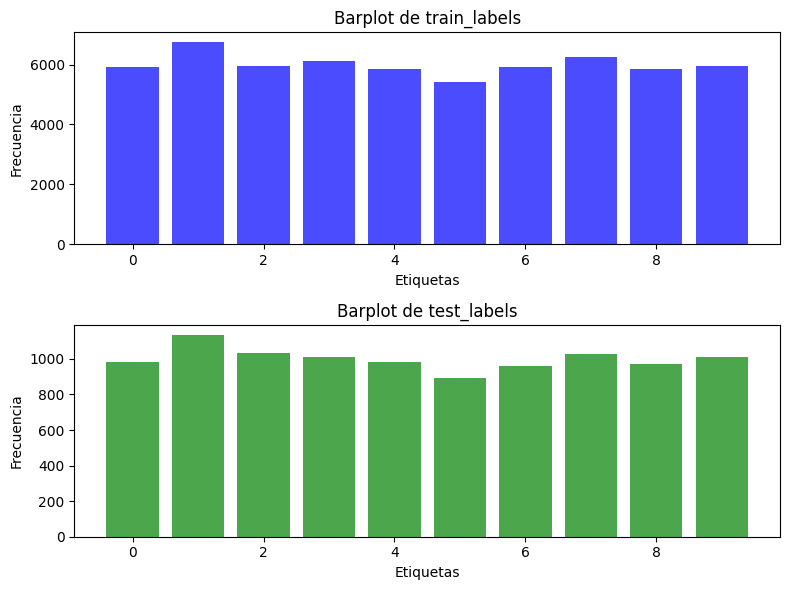

In [6]:
import matplotlib.pyplot as plt
import numpy as np

train_counts = np.bincount(train_labels)
test_counts = np.bincount(test_labels)

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Barplot para train_labels
axs[0].bar(np.arange(len(train_counts)), train_counts, color='blue', alpha=0.7)
axs[0].set_title('Barplot de train_labels')
axs[0].set_xlabel('Etiquetas')
axs[0].set_ylabel('Frecuencia')

# Barplot para test_labels
axs[1].bar(np.arange(len(test_counts)), test_counts, color='green', alpha=0.7)
axs[1].set_title('Barplot de test_labels')
axs[1].set_xlabel('Etiquetas')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Aquí se observa la cantidad de imágenes correspondientes a cada uno de los dígitos. En ambos casos, los datos se asemejan a una distribución uniforme, lo que indica que se intentó manejar la misma cantidad de imágenes para el ejercicio de reconocimiento de dígitos. Sin embargo, en ambas bases de datos, se destaca que hay más imágenes del dígito '1', mientras que el dígito con menos imágenes es el número '5'.

Para que nuestra red reciba un vector y no una matriz, necesitamos cambiar la dimensionalidad de nuestros datos. Para eso podemos usar:

In [7]:
train_images = train_images.reshape ((60000 , 28 * 28) )
train_images = train_images.astype ("float32") / 255
test_images = test_images.reshape ((10000 , 28 * 28) )
test_images = test_images.astype ("float32") / 255

En esta celda, tanto para la base de datos de entrenamiento como para la de prueba, estamos ajustando la dimensionalidad de los datos para preparar adecuadamente los inputs para nuestra red neuronal. En lugar de trabajar con matrices de 28x28, transformamos los datos en un vector de longitud 784 (28x28) utilizando la función reshape(). Posteriormente, normalizamos estos vectores dividiendo cada valor por 255, lo que convierte la escala de los píxeles, originalmente entre 1 y 255, a un rango entre 0 y 1. Esto facilita el proceso de aprendizaje del modelo.

Cree una red neuronal usando neuronas sigmoides y una capa final softmax. Para esto puede
usar la funcion Sequential de keras:

In [8]:
model = keras.Sequential ([
layers.Dense(512 , activation ="sigmoid") ,
layers.Dense (10 , activation ="softmax")
])

En esta celda, la función Sequential se utiliza para crear un modelo secuencial, este modelo permite apilar capas de forma lineal, es decir, una capa tras otra.

Para este caso se crea un modelo secuencial con dos capas densas (Dense):

*   La primera capa tiene 512 neuronas con la función de activación sigmoide
*   La segunda capa tiene 10 neuronas con la función de activación softmax

La segunda capa de la red uso la función de activación softmax se utiliza principalmente cuando el objetivo es la clasificación multiclase. Esta función toma un vector de valores de entrada (que puede ser cualquier número real) y los convierte en probabilidades, es decir, en valores en el rango [0, 1] que suman 1.

Cada neurona de la capa softmax produce un valor que representa la probabilidad de que la entrada pertenezca a una de las clases específicas. En este caso, se generará 10 probabilidades, una para cada digito posible. La clase con la probabilidad más alta es la predicción del modelo.

In [9]:
model.compile( optimizer="SGD",
loss ="SparseCategoricalCrossentropy",
metrics =["accuracy"])

La función compile se utiliza para configurar el modelo antes de entrenarlo. Es un paso crucial que define cómo el modelo se optimizará y evaluará durante el proceso de entrenamiento. Al llamar a model.compile(), se especifican tres aspectos clave: el optimizador, la función de pérdida y las métricas de evaluación. Aunque los tres parametros son claves para evaluar el modelo en el entrenamiento para este caso, es clave mencionar que la funcion de perdida usada como "SparseCategoricalCrossentropy", es adecuada para problemas de clasificación multiclase donde las etiquetas son enteros en lugar de vectores one-hot. Esta función de pérdida compara la probabilidad predicha para cada clase (producida por la activación softmax) con la clase real y calcula la pérdida para cada muestra.

In [10]:
model.fit( train_images, train_labels , epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.5620 - loss: 1.7235
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.8512 - loss: 0.6748
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.8707 - loss: 0.5046
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.8845 - loss: 0.4365
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.8916 - loss: 0.3950


La función fit es lo que utilizaremos para entrenar el modelo con los datos proporcionados. Es el método principal para ajustar los parámetros, donde el modelo iterativamente ajusta sus pesos para minimizar la función de pérdida definida durante la compilación. En los cuales nos pediran los datos de entrenamiento; los datos de prueba; la cantidad de epocas que se refiere a una pasada completa por todo el conjunto de datos de entrenamiento.

Entonces lo que nos muestra los resultados del modelo, es que nos muestra cuanto tardo en ejecutarse una epoca y nos arroja al nivel de entrenamiento cuanto fue la precision y el valor de su funcion de perdida. Conforme van avanzando la epocas la precision debe aumentar y el valor de la funcion de perdida debe disminuir que es cierto, en este caso. Empezamos con una precision de 56.35% y funcion de perdida del 1.722 y al finalizar la 5 epocas quedaran en una precision del 89.19% y funcion de perdida del 0.3975 dandonos un indicio que el modelo esta teniendo un buen ajuste.  

In [11]:
test_loss , test_acc = model.evaluate( test_images , test_labels )

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.8830 - loss: 0.4120


La función evaluate se utiliza para medir el rendimiento de un modelo entrenado en un conjunto de datos de prueba. Esta función calcula la pérdida y las métricas que fueron definidas durante la compilación del modelo. En este caso, como parámetros se requieren los datos de las imágenes de prueba y sus respectivas etiquetas (labels) que identifican a qué tipo de imagen corresponde cada una. La función devuelve los mismos tipos de valores que se utilizaron durante el entrenamiento.

En este ejemplo, se obtuvo una precisión de 0.8814, lo cual se puede considerar bueno para predecir dígitos en imágenes. La función de pérdida es de 0.4145, lo que es considerablemente bajo y cercano a los resultados obtenidos con los datos de entrenamiento. Esto sugiere que, además de estar bien ajustado, el modelo también arroja resultados bastante buenos para realizar predicciones en datos nuevos.

## Ejercicio 4

(40 pts) Utilizando lo aprendido en el numeral anterior, diseñe por lo menos 4 redes diferentes (con distinto número de capas intermedias, distintos números de neuronas en ellas y distintas activaciones). Inicie y entrene sus redes múltiples veces. Describa las redes usadas y sus resultados. ¿Cuál es el mejor desempeño que logra conseguir (porcentaje de acierto con el conjunto de
prueba)?
